# Introduction

Jupyter notebooks ([@perez2015project; @kluyver2016jupyter; @ragan2014jupyter]) are one of the most popular platforms for doing reproducible research. Stencila supports importing of Jupyter Notebook `.ipynb` files. This allows you to work with collegues to refine a document for final publication while still retaining the code cells, and thus reprodubility of your the work. In the future we also plan to support exporting to `.ipynb` files.  

# Markdown cells

Most standard Markdown should be supported by the importer including inline `code`, headings etc (although the Stencila user interface do not currently support rendering of some elements e.g. math and lists).


# Code cells

Code cells in notebooks are imported without loss. Stencila's user interface currently differs from Jupyter in that code cells are executed on update while you are typing. This produces a very reactive user experience but is inappropriate for more compute intensive, longer running code cells. We are currently working on improving this to allowing users to decide to execute cells explicitly (e.g. using `Ctrl+Enter`).

In [4]:
import sys
import time
'Hello this is Python %s.%s and it is %s' % (sys.version_info[0], sys.version_info[1], time.strftime('%c'))


'Hello this is Python 3.5 and it is Tue Feb 13 10:56:10 2018'

Stencila also support Jupyter code cells that produce plots. The cell below produces a simple plot based on the example from [the Matplotlib website](https://matplotlib.org/examples/shapes_and_collections/scatter_demo.html). Try changing the code below (for example, the variable `N`).

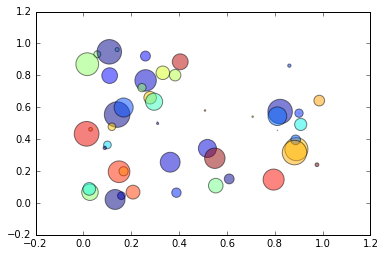

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
N = min(N, 1000) # Prevent generation of too many numbers :)
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

We are currently working on supporting [Jupyter's magic commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html) in Stencila via a bridge to Jupyter kernels.

# Metadata

To add some metadata about the document (such as authors, title, abstract and so on), In Jupyter, select `Edit -> Edit Notebook metadata` from the top menu.  Add the title and abstract as JSON strings and authors and organisations metadata as [JSON arrays](https://www.w3schools.com/js/js_json_arrays.asp). Author `affiliation` identifiers (like `university-of-earth` below) must be unique and preferably use only lowercase characters and no spaces.
 
For example,

```
 "authors": [
    {
      "given-names": "Your first name goes here",
      "surname": "Your last name goes here",
      "email": "your.email@your-organisation",
      "corresponding": "yes / no",
      "affiliation": "university-of-earth"
    }
  ],
  
  "organisations": [ 
     {
      "university-of-earth": {
        "institution": "Your organisation name",
        "city": "Your city",
        "country": "Your country" 
      }
    ],

  "title": "Your title goes here",
  "abstract": "This is a paper about lots of different interesting things",
  
 ```
 


# Citations and references 

Stencila supports Pandoc style citations and reference lists within Jupyter notebook Markdown cells. Add a `bibliography` entry to the notebook's metadata which points to a file containing your list of references e.g.

```json
"bibliography": "my-bibliography.bibtex"
```

Then, within Markdown cells, you can insert citations inside square brackets and separated by semicolons. Each citation is represented using the `@` symbol followed by the citation identifier from the bibliography database e.g.

```json
[@perez2015project; @kluyver2016jupyter]
```

The [cite2c](https://github.com/takluyver/cite2c) Jupyter extension allows for easier, "cite-while-you-write" insertion of citations from a Zotero library. We're hoping to support conversion of cite2cstyle citations/references in the [future](https://github.com/stencila/convert/issues/14).
